In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_data
sns.set_context('paper')

# setting to display treemap in vscode
import plotly.io as pio
pio.renderers.default = "notebook_connected"

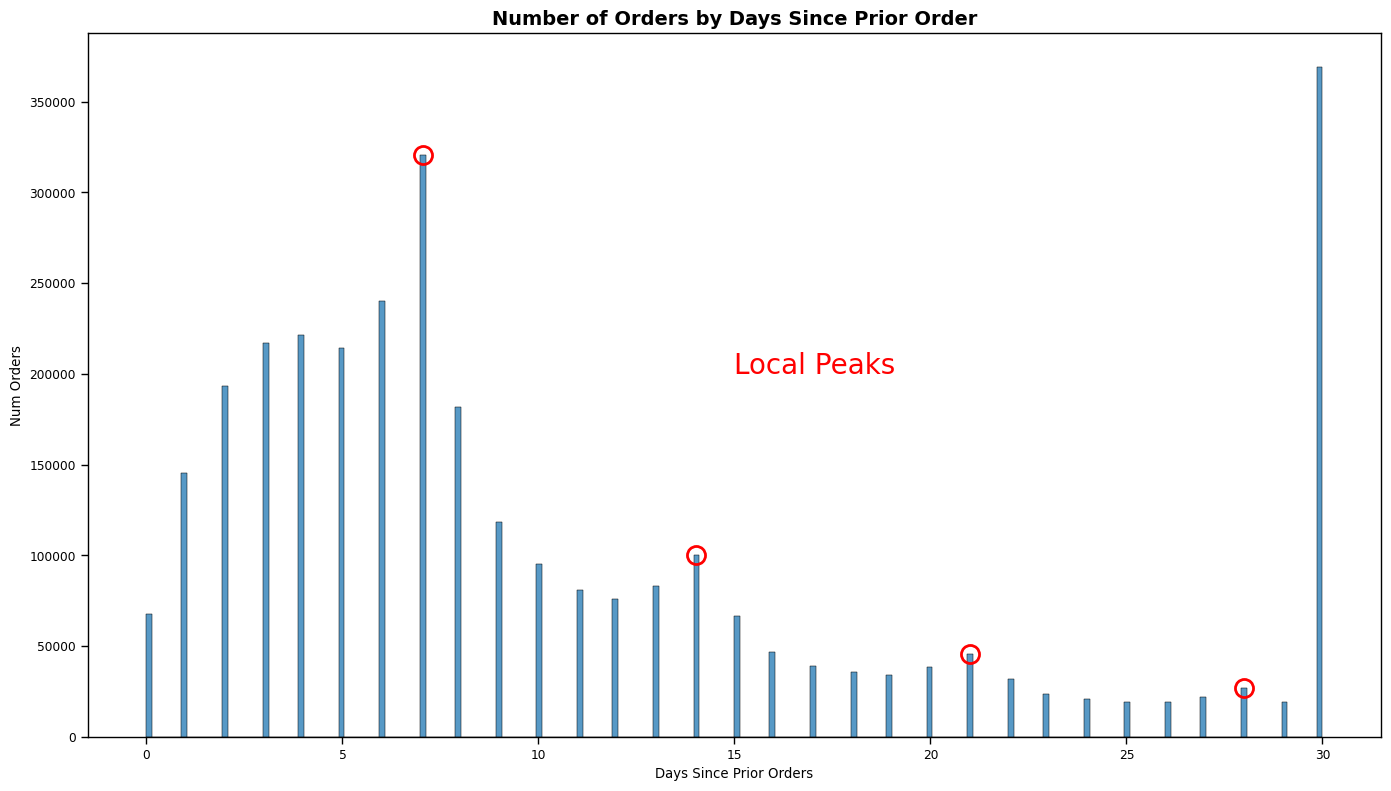

In [2]:
# Number of Orders by Days Since Prior Order
orders = read_data(read_orders=True)
plt.figure(figsize=(14,8))
sns.histplot(data=orders, x='days_since_prior_order')
# add annotation
plt.plot(7.05, 320608, 'ro', ms=13, mfc='None', mew=2)
plt.plot(14.025, 100230, 'ro', ms=13, mfc='None', mew=2)
plt.plot(21.02, 45470, 'ro', ms=13, mfc='None', mew=2)
plt.plot(28.01, 26777, 'ro', ms=13, mfc='None', mew=2)
plt.text(x=15, y=200000, s='Local Peaks', fontdict={'size': 20, 'color':'r'})
# format
plt.xlabel('Days Since Prior Orders')
plt.ylabel('Num Orders')
plt.title('Number of Orders by Days Since Prior Order', weight='bold', size=14)
plt.tight_layout()
plt.grid(False)
plt.savefig('images/Number of Orders by Days Since Prior Order.png')
plt.show()

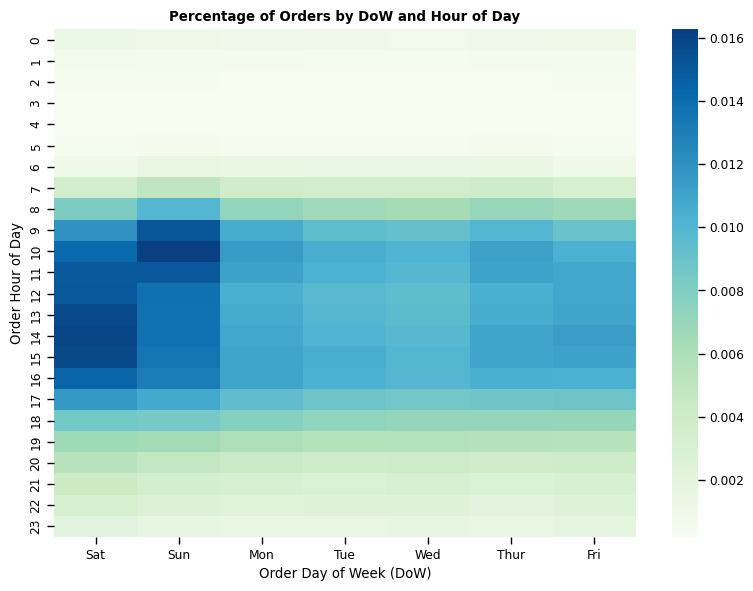

In [3]:
# Order Day of the week and hour of the day
orders = read_data(read_orders=True)
orders['order_dow'].replace({0: 'Sat', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thur', 6:'Fri'}, inplace=True)
orders_heatmap = pd.crosstab(orders['order_hour_of_day'], orders['order_dow'], normalize=True)
plt.figure(figsize=(8,6))
orders_heatmap = orders_heatmap[['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']]
sns.heatmap(data=orders_heatmap, cmap='GnBu')
plt.xlabel('Order Day of Week (DoW)')
plt.ylabel('Order Hour of Day')
plt.title('Percentage of Orders by DoW and Hour of Day', weight='bold')
plt.tight_layout()
plt.show(block=True)

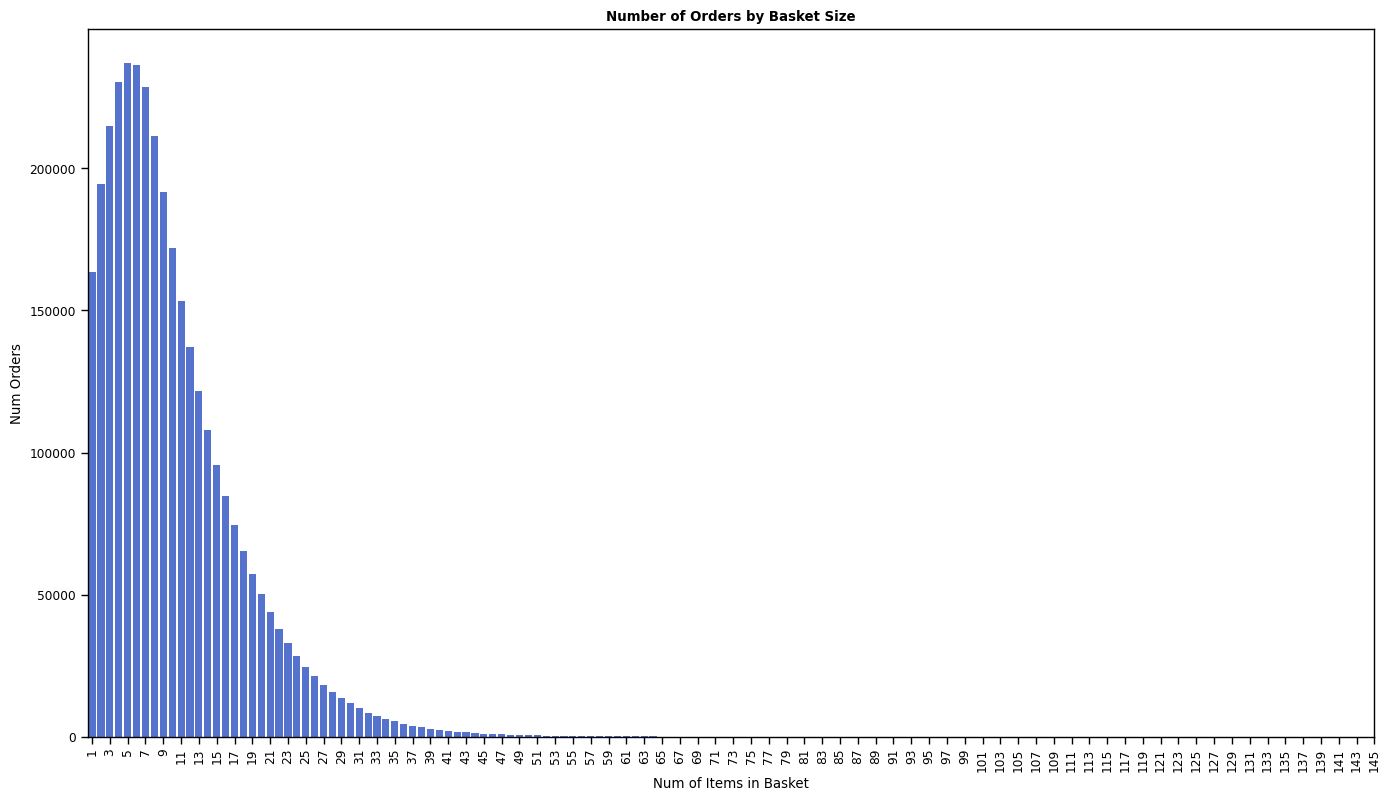

In [4]:
# Num Orders by Basket Size
prior_train_details = pd.read_pickle('data/prior_train_details.pickle')
order_size = prior_train_details.groupby('order_id').agg({'product_id':'nunique'}).rename(columns={'product_id':'basket_size'}).reset_index()
basket_size_dist = order_size.groupby('basket_size').agg({'order_id':'nunique'}).reset_index()

plt.figure(figsize=(14,8))
sns.barplot(x='basket_size', y='order_id', data=basket_size_dist, color='royalblue')
plt.xlabel('Num of Items in Basket')
plt.ylabel('Num Orders')
plt.title('Number of Orders by Basket Size', weight='bold')
plt.tight_layout()
plt.xticks(ticks=range(0, 145, 2), labels=range(1, 146, 2), rotation='vertical')
plt.show(block=True)

In [5]:
prior_order_details = pd.read_pickle('data/prior_order_details.pickle')[['order_id', 'product_id', 'reordered']]
products = pd.read_pickle('data/products.pickle')[['product_id', 'product_name', 'aisle', 'department']]
prior_order_details = prior_order_details.merge(products, how='left')
prior_order_details.head()

,order_id,product_id,reordered,product_name,aisle,department
0,2539329,196,0,Soda,soft drinks,beverages
1,2539329,14084,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,12427,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,26088,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,26405,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


In [6]:
cnts = prior_order_details.groupby(['department', 'aisle']).agg({'order_id':'nunique',
                                                                'reordered':'mean',
                                                                 'product_id':'nunique'}).reset_index().rename(columns=
                                                                                                          {'order_id':'num purchases',
                                                                                                          'reordered':'reorder rate',
                                                                                                          'product_id':'num products'})
cnts.head()

,department,aisle,num purchases,reorder rate,num products
0,alcohol,beers coolers,29750,0.565304,385
1,alcohol,red wines,25306,0.548734,232
2,alcohol,specialty wines champagnes,9885,0.486337,95
3,alcohol,spirits,22918,0.572344,195
4,alcohol,white wines,25269,0.630081,147


In [7]:
fig = px.treemap(cnts, 
                 path=[px.Constant("all"), 'department', 'aisle'], values='num products',
                 title = 'Instacart Product Organization'
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [8]:
fig = px.treemap(cnts, 
                 path=[px.Constant("all"), 'department', 'aisle'], values='num purchases',
                 color = 'num purchases', color_continuous_scale='BuGn',
                 title = 'Sales by Department and Aisle',
                 width = 1000,
                 height = 600
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [9]:
fig = px.treemap(cnts, 
                 path=[px.Constant("all"), 'department', 'aisle'], values='reorder rate',
                 color = 'reorder rate', color_continuous_scale='Blues',
                 color_continuous_midpoint = np.average(cnts['reorder rate'], weights=cnts['num purchases']),
                 title = 'Reorder Rate by Department and Aisle',
                 width = 1000,
                 height = 600
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()